이상치 정제

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame({
    'sex': [1,2,1,3,2,1],
    'score': [5,4,3,4,2,6,]
})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [4]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [5]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [8]:
df['sex'] = np.where(df['sex']==3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [9]:
df['score'] = np.where(df['score']>5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [10]:
df.dropna(subset=['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [11]:
df.dropna(subset=['sex', 'score']).groupby('sex')

In [12]:
df.dropna(subset=['sex', 'score']).groupby('sex').agg(mean_score=('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [13]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


이상치 제거 - 극단적인 값

In [7]:
mpg = pd.read_csv('./Data/mpg.csv')
import seaborn as sns
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<Axes: ylabel='hwy'>

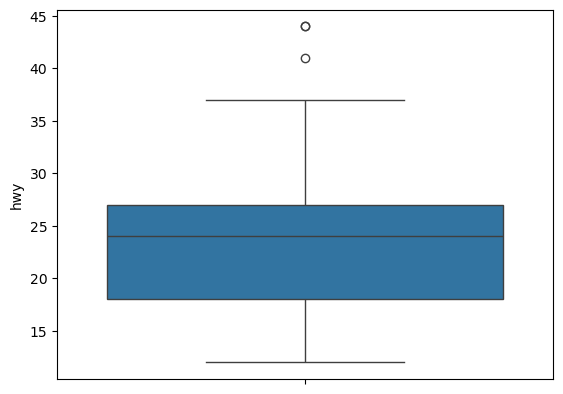

In [6]:
sns.boxplot(data=mpg, y='hwy')

그래프

<Axes: xlabel='displ', ylabel='hwy'>

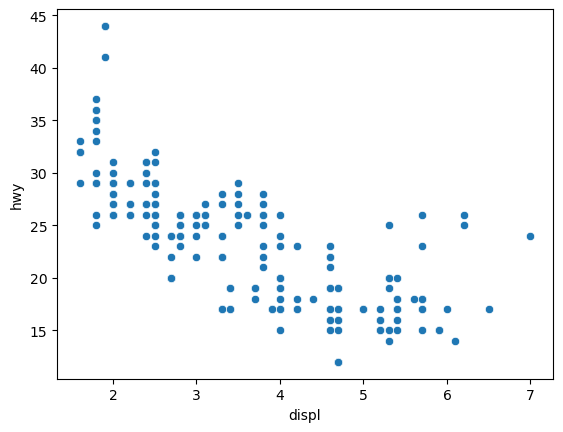

In [8]:
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(3.0, 6.0), (10.0, 30.0)]

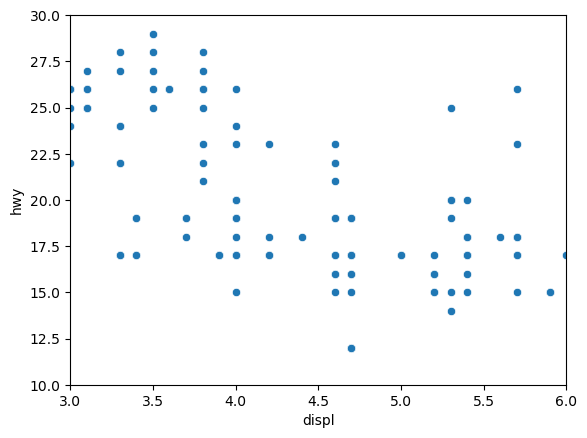

In [9]:
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim= (3,6), ylim=(10,30))

<Axes: xlabel='displ', ylabel='hwy'>

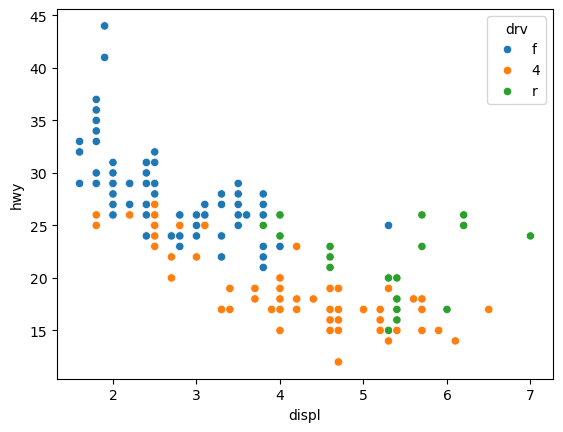

In [10]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

In [12]:
economics = pd.read_csv('./Data/economics.csv')
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


In [13]:
economics.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,7626.325000,290290.750000,11.100000,9.100000,8685.500000
max,12193.800000,320402.295000,17.300000,25.200000,15352.000000


<Axes: xlabel='date', ylabel='unemploy'>

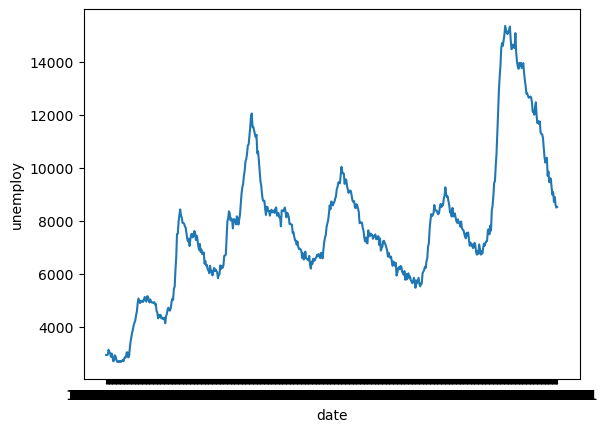

In [15]:
sns.lineplot(data=economics, x='date', y='unemploy')

In [20]:
economics['date2'] = pd.to_datetime(economics['date'])

In [17]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   data2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [21]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [22]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [23]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [25]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,data2,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

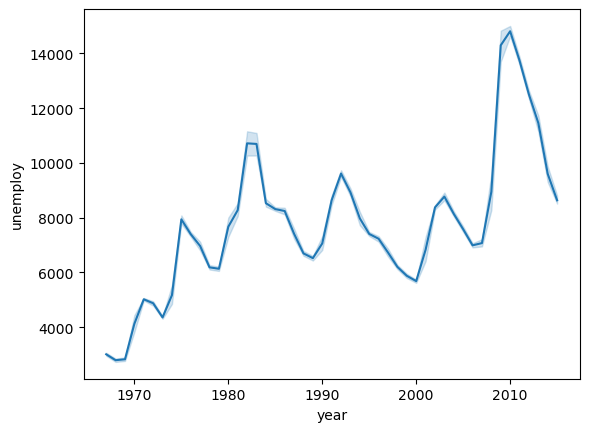

In [26]:
sns.lineplot(data=economics, x='year', y='unemploy')

<Axes: xlabel='drv', ylabel='hwy'>

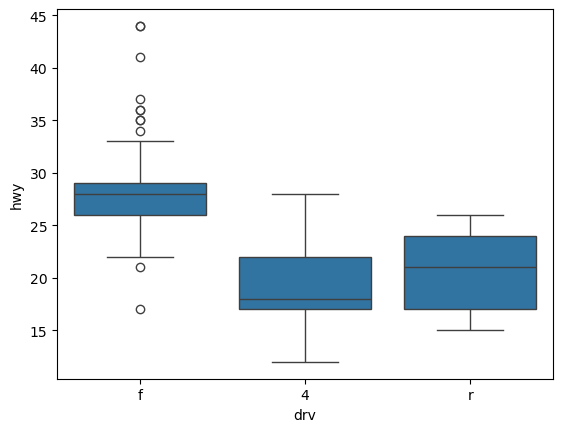

In [27]:
sns.boxplot(data=mpg, x='drv', y='hwy')

데이터 분석

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
raw_welfare = pd.read_spss("./Data/Koweps_hpwc14_2019_beta2.sav")

In [4]:
raw_welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [5]:
welfare = raw_welfare.copy()

In [6]:
welfare
welfare.shape
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [7]:
welfare = welfare.rename(columns={
    'h14_g3': 'sex',
    'h14_g4': 'birth',
    'h14_g10': 'marriage_type',
    'h14_g11': 'religion',
    'p1402_8aq1': 'income',
    'h14_eco9': 'code_job',
    'h14_reg7': 'code_region'
})

In [8]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [9]:
welfare['sex'].dtype

dtype('float64')

In [10]:
welfare['sex'].isna().sum()

np.int64(0)

In [11]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

In [12]:
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

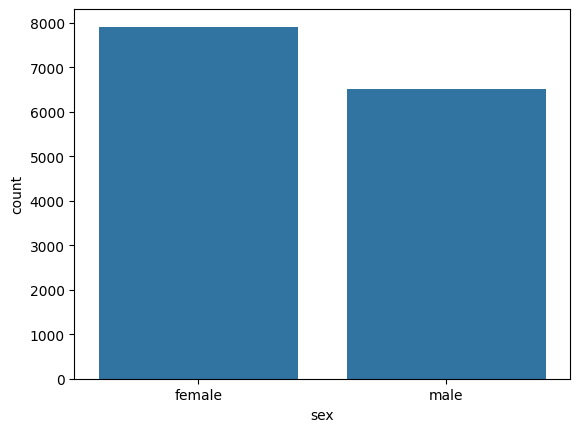

In [13]:
sns.countplot(data=welfare, x='sex')

In [14]:
welfare['income'].dtype

dtype('float64')

In [15]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

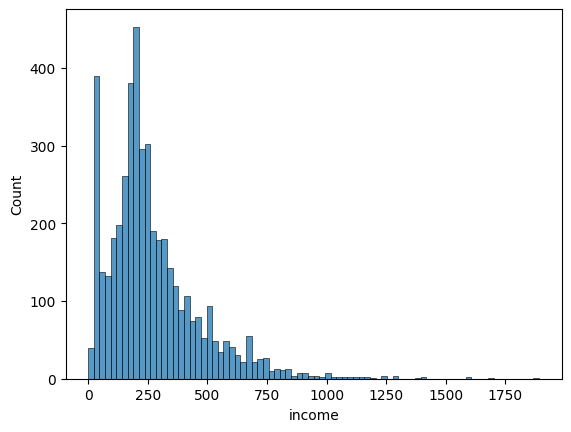

In [16]:
sns.histplot(data=welfare, x='income')

In [17]:
welfare['income'].isna().sum()

np.int64(9884)

In [19]:
welfare['income'] = np.where(welfare['income']==9999, np.nan, welfare['income'])

In [22]:
sex_income = welfare.dropna(subset=['income']).groupby('sex').agg(mean_income = ('income', 'mean'))
sex_income

,mean_income
sex,
female,186.293096
male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

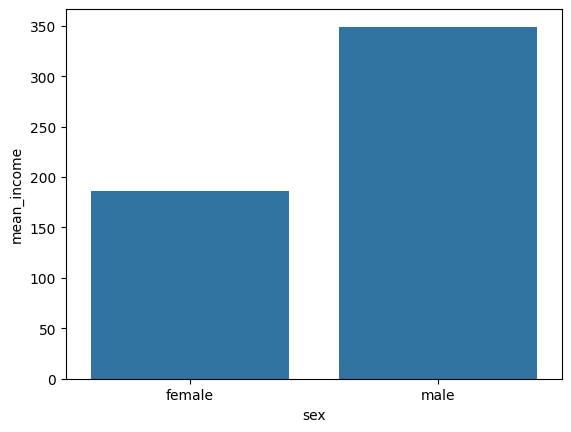

In [23]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [24]:
welfare['birth'].dtypes

dtype('float64')

In [25]:
welfare['birth'].describe

<bound method NDFrame.describe of 0        1945.0
1        1948.0
2        1942.0
3        1962.0
4        1963.0
          ...  
14413    1967.0
14414    1992.0
14415    1995.0
14416    1998.0
14417    2001.0
Name: birth, Length: 14418, dtype: float64>

<Axes: xlabel='birth', ylabel='Count'>

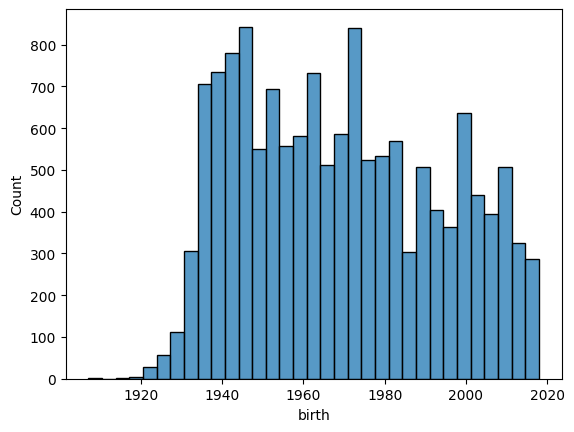

In [26]:
sns.histplot(data=welfare, x='birth')

In [27]:
welfare['birth'].isna().sum()

np.int64(0)

In [28]:
welfare = welfare.assign(age=2019-welfare['birth']+1)

In [29]:
welfare['age'].describe

<bound method NDFrame.describe of 0        75.0
1        72.0
2        78.0
3        58.0
4        57.0
         ... 
14413    53.0
14414    28.0
14415    25.0
14416    22.0
14417    19.0
Name: age, Length: 14418, dtype: float64>

In [32]:
age_income = welfare.dropna(subset=['income']).groupby('age').agg(mean_income = ('income', 'mean'))
age_income

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
...,...
88.0,27.000000
89.0,27.000000
90.0,27.000000


<Axes: xlabel='age', ylabel='mean_income'>

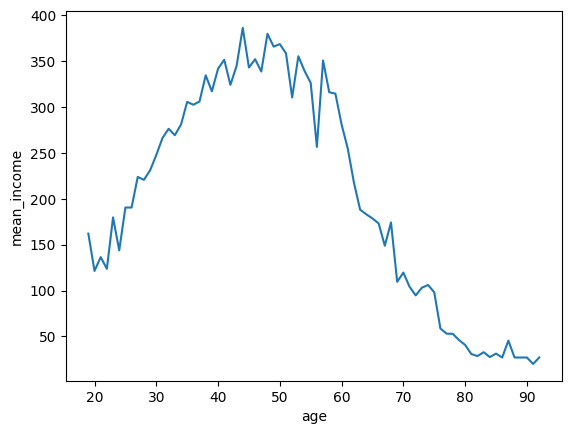

In [33]:
sns.lineplot(data=age_income, x='age', y='mean_income')